# Skaters (Season 2024/25) - Distributions

## Step 0: Import libraries

In [118]:
import pandas as pd
import numpy as np

import os

In [119]:
from utils import df_utils, distributions_utils

## Step 1: Import the dataset

In [120]:
skaters_df = "https://moneypuck.com/moneypuck/playerData/seasonSummary/2024/regular/skaters.csv"
df = pd.read_csv(skaters_df)
df.head(5)

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0


## Step 2: Read the data

In [121]:
df_utils.print_df_size(df)

Number of samples: 4600
Number of features: 154


In [122]:
df_utils.save_column_names(df)

Saved: names_columns.txt


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.4+ MB


## Step 3: Data cleaning

In [124]:
# Missing values?
df_utils.report_nan(df)

No missing values found.


## Step 4: Summary statistics and Frequency Tables

In [125]:
feature="I_F_goals"

answer = df[df["situation"] == "all"].loc[lambda d: d[feature].idxmax()]
print(f"Top goal scorer: {answer["name"]} with {int(answer[feature])} goals.")

answer = df[df["situation"] == "5on4"].loc[lambda d: d['I_F_goals'].idxmax()]
print(f"Top goal scorer in 5-on-4 situations: {answer["name"]} with {int(answer[feature])} goals.")

answer = df[df["situation"] == "4on5"].loc[lambda d: d['I_F_goals'].idxmax()]
print(f"Top goal scorer in 4-on-5 situations: {answer["name"]} with {int(answer[feature])} goals.")

Top goal scorer: Leon Draisaitl with 52 goals.
Top goal scorer in 5-on-4 situations: Jake Guentzel with 15 goals.
Top goal scorer in 4-on-5 situations: Alex Tuch with 6 goals.


Mean: 8.58
Variance: 96.74
Standard deviation: 9.83
Mode: 0.0


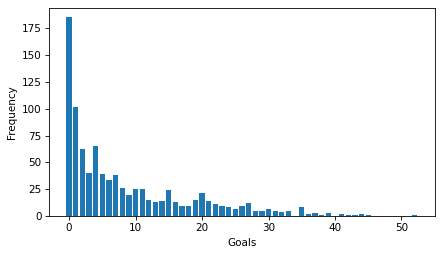

In [126]:
situation = "all"
feature = "I_F_goals"

all_situations_df = df[df["situation"]==situation]
distributions_utils.plot_ftab(all_situations_df, feature, xlabel="Goals")

In the previous chart, the mode was 0 goals, largely due to players with limited ice time. 

To focus on meaningful performance, this chart includes only skaters who played a minimum number of games.

Mean: 11.19
Variance: 99.17
Standard deviation: 9.95
Mode: 4.0


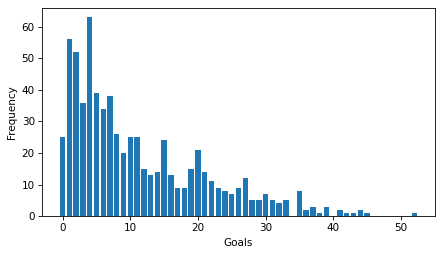

In [127]:
situation = "all"
feature = "I_F_goals"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
distributions_utils.plot_ftab(all_situations_df, feature, xlabel="Goals")

Cohen's effect size: 1.15


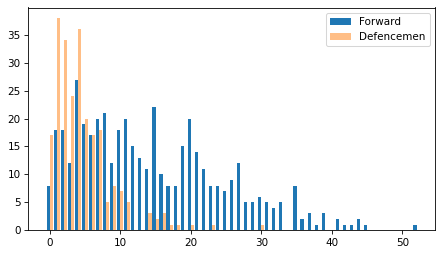

In [128]:
situation = "all"
feature = "I_F_goals"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
df1 = all_situations_df[all_situations_df["position"]!="D"]
df2 = all_situations_df[all_situations_df["position"]=="D"]

distributions_utils.plot_two_ftabs(df1, df2, feature, name1="Forward", name2="Defencemen")

In [129]:
feature="I_F_points"

answer = df[df["situation"] == "all"].loc[lambda d: d[feature].idxmax()]
print(f"Top point scorer: {answer["name"]} with {int(answer[feature])} points.")

answer = df[df["situation"] == "5on4"].loc[lambda d: d[feature].idxmax()]
print(f"Top point scorer in 5-on-4 situations: {answer["name"]} with {int(answer[feature])} points.")

answer = df[df["situation"] == "4on5"].loc[lambda d: d[feature].idxmax()]
print(f"Top point scorer in 4-on-5 situations: {answer["name"]} with {int(answer[feature])} points.")

Top point scorer: Nikita Kucherov with 121 points.
Top point scorer in 5-on-4 situations: Nikita Kucherov with 39 points.
Top point scorer in 4-on-5 situations: Alex Tuch with 8 points.


Mean: 29.96
Variance: 508.01
Standard deviation: 22.52
Mode: [7. 8.]


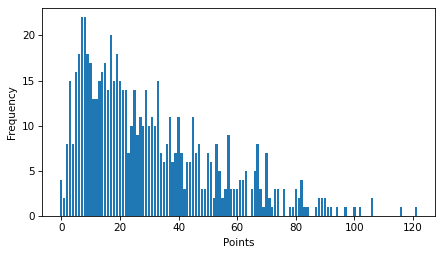

In [130]:
situation = "all"
feature = "I_F_points"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
distributions_utils.plot_ftab(all_situations_df, feature, xlabel="Points")

Cohen's effect size: 0.61


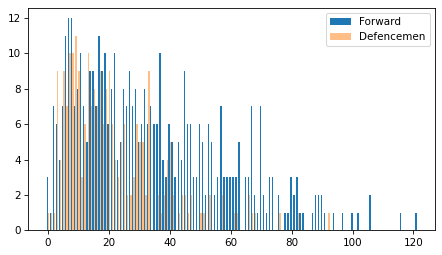

In [131]:
situation = "all"
feature = "I_F_points"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
df1 = all_situations_df[all_situations_df["position"]!="D"]
df2 = all_situations_df[all_situations_df["position"]=="D"]

distributions_utils.plot_two_ftabs(df1, df2, feature, name1="Forward", name2="Defencemen")

In [132]:
feature="I_F_penalityMinutes"

answer = df[df["situation"] == "all"].loc[lambda d: d[feature].idxmax()]
print(f"Player with most penality minutes: {answer["name"]} with {answer[feature]} minutes.")

Player with most penality minutes: Mathieu Olivier with 129.0 minutes.


Mean: 26.57
Variance: 332.98
Standard deviation: 18.23
Mode: [14. 16.]


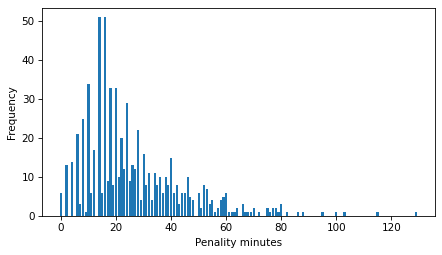

In [133]:
situation = "all"
feature = "I_F_penalityMinutes"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
distributions_utils.plot_ftab(all_situations_df, feature, xlabel="Penality minutes")

Cohen's effect size: -0.12


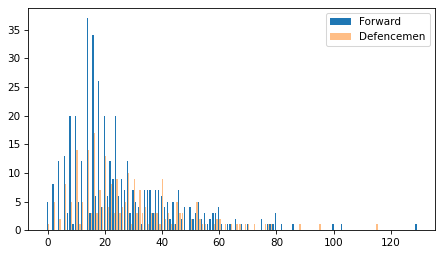

In [134]:
situation = "all"
feature = "I_F_penalityMinutes"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
df1 = all_situations_df[all_situations_df["position"]!="D"]
df2 = all_situations_df[all_situations_df["position"]=="D"]

distributions_utils.plot_two_ftabs(df1, df2, feature, name1="Forward", name2="Defencemen")

**Icetime** feature is converted from seconds to minutes.

In [135]:
feature="icetime"

icetime_df = df.copy()
icetime_df[feature] = icetime_df[feature] / 60

answer = icetime_df[icetime_df["situation"]=="all"].loc[lambda d: d[feature].idxmax()]
print(f"Player with most icetime minutes: {answer["name"]} with {answer[feature]:.2f} minutes.")

Player with most icetime minutes: Zach Werenski with 2166.37 minutes.


To improve readability and avoid excessive granularity, icetime was converted from seconds to whole hours. 

This reduces noise in the frequency table and highlights broader patterns in playing time among skaters who played at least 20 games.

Mean: 17.69
Variance: 54.28
Standard deviation: 7.36
Mode: 19.0


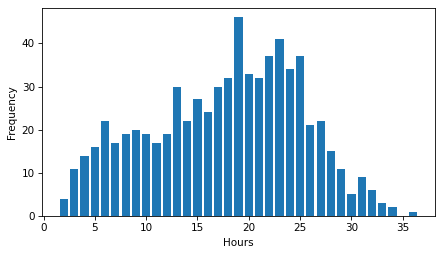

In [136]:
situation = "all"
feature = "icetime"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
all_situations_df.loc[:, feature] = all_situations_df[feature] // 3600
distributions_utils.plot_ftab(all_situations_df, feature, xlabel="Hours")

Cohen's effect size: -0.50


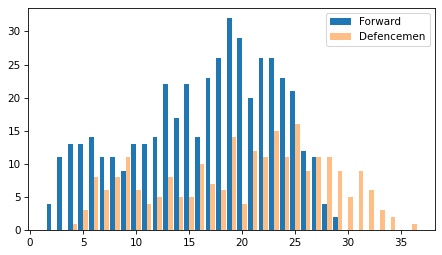

In [137]:
situation = "all"
feature = "icetime"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
all_situations_df.loc[:, feature] = all_situations_df[feature] // 3600
df1 = all_situations_df[all_situations_df["position"]!="D"]
df2 = all_situations_df[all_situations_df["position"]=="D"]

distributions_utils.plot_two_ftabs(df1, df2, feature, name1="Forward", name2="Defencemen")

In [138]:
feature="I_F_hits"

answer = df[df["situation"] == "all"].loc[lambda d: d[feature].idxmax()]
print(f"Player with most hits: {answer["name"]} with {int(answer[feature])} hits.")

Player with most hits: Kiefer Sherwood with 462 hits.


Mean: 78.08
Variance: 3317.59
Standard deviation: 57.56
Mode: [19. 26. 50.]


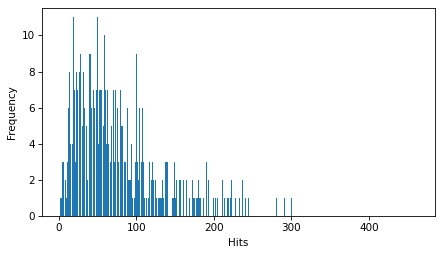

In [144]:
situation = "all"
feature = "I_F_hits"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
distributions_utils.plot_ftab(all_situations_df, feature, xlabel="Hits")

Cohen's effect size: 0.26


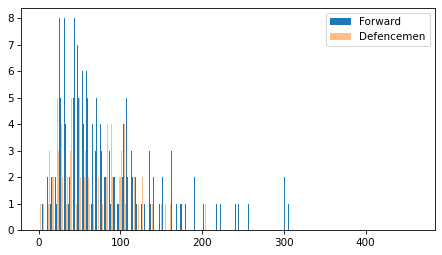

In [140]:
situation = "all"
feature = "I_F_hits"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
df1 = all_situations_df[all_situations_df["position"]!="D"]
df2 = all_situations_df[all_situations_df["position"]=="D"]

distributions_utils.plot_two_ftabs(df1, df2, feature, name1="Forward", name2="Defencemen")

In [141]:
feature="I_F_blockedShotAttempts"

answer = df[df["situation"] == "all"].loc[lambda d: d[feature].idxmax()]
print(f"Player with most blocked shot attempts: {answer["name"]} with {int(answer[feature])} blocks.")

Player with most blocked shot attempts: Cale Makar with 231 blocks.


Mean: 61.47
Variance: 1504.99
Standard deviation: 38.77
Mode: 51.0


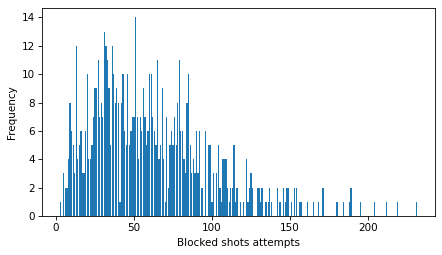

In [145]:
situation = "all"
feature = "I_F_blockedShotAttempts"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
distributions_utils.plot_ftab(all_situations_df, feature, xlabel="Blocked shots attempts")

Cohen's effect size: -0.73


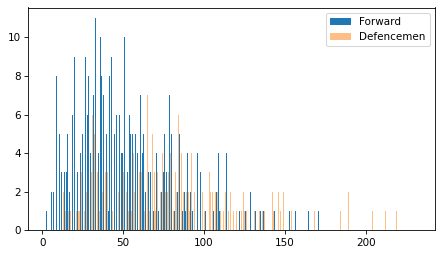

In [143]:
situation = "all"
feature = "I_F_blockedShotAttempts"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
df1 = all_situations_df[all_situations_df["position"]!="D"]
df2 = all_situations_df[all_situations_df["position"]=="D"]

distributions_utils.plot_two_ftabs(df1, df2, feature, name1="Forward", name2="Defencemen")